In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pickle

In [33]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [35]:
X=df['text']
y=df['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split (X,  y, test_size = 0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform (X_test)

print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform (X_train)

tfidf_test = tfidf_vectorizer.transform (X_test)

print(tfidf_vectorizer.get_feature_names_out()[:10])

print(tfidf_train.A[:5])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
count_df = pd.DataFrame(count_train.A,columns = count_vectorizer.get_feature_names_out())

tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names_out())

print(count_df.head())

print(tfidf_df.head())

difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

print(count_df.equals(tfidf_df))

   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    

In [39]:
X_train, X_test, y_train, y_test = train_test_split (X,  y, test_size = 0.33, random_state=53)

In [40]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

score = accuracy_score(y_test, pred)

print(score)



0.893352462936394


In [41]:
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

print(cm)

[[ 865  143]
 [  80 1003]]


<Axes: >

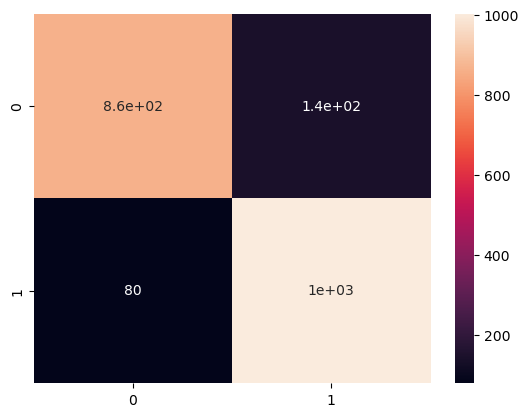

In [42]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [43]:
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

score = accuracy_score(y_test, pred)

print(score)

0.8565279770444764


In [44]:
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

print(cm)

[[ 739  269]
 [  31 1052]]


<Axes: >

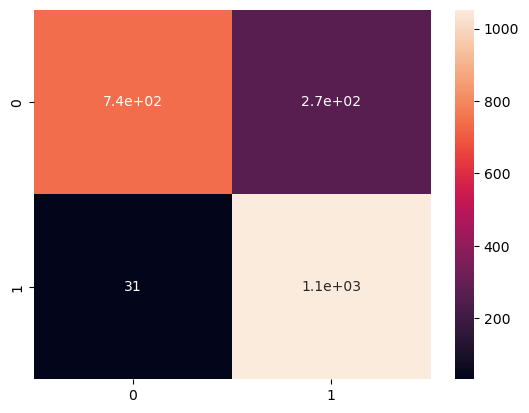

In [45]:
import seaborn as sns

sns.heatmap(cm, annot=True)

In [46]:
alphas = np.arange(0, 1, 0.1)

def train_and_predict(alpha):
    nb_classifier =  MultinomialNB(alpha=alpha)
    
    nb_classifier.fit(tfidf_train, y_train)
    
    pred = nb_classifier.predict(tfidf_test)
    
    score = accuracy_score(y_test, pred)
    return score
    
for alpha in alphas:
    print('Alpha:', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha: 0.0
Score:  0.6150167384026781

Alpha: 0.1
Score:  0.8976566236250598

Alpha: 0.2
Score:  0.8938307030129125

Alpha: 0.30000000000000004


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Score:  0.8900047824007652

Alpha: 0.4
Score:  0.8857006217120995

Alpha: 0.5
Score:  0.8842659014825442

Alpha: 0.6000000000000001
Score:  0.874701099952176

Alpha: 0.7000000000000001
Score:  0.8703969392635102

Alpha: 0.8
Score:  0.8660927785748446

Alpha: 0.9
Score:  0.8589191774270684



In [47]:
class_labels = nb_classifier.classes_
feature_names = tfidf_vectorizer.get_feature_names_out()

feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

print(class_labels[0], feat_with_weights[:20]) 

print(class_labels[1], feat_with_weights[-20:]) 

FAKE [(-11.280753302177917, '00000031'), (-11.280753302177917, '00006'), (-11.280753302177917, '000ft'), (-11.280753302177917, '001'), (-11.280753302177917, '002'), (-11.280753302177917, '003'), (-11.280753302177917, '006'), (-11.280753302177917, '008'), (-11.280753302177917, '010'), (-11.280753302177917, '013'), (-11.280753302177917, '025'), (-11.280753302177917, '027'), (-11.280753302177917, '035'), (-11.280753302177917, '037'), (-11.280753302177917, '040'), (-11.280753302177917, '044'), (-11.280753302177917, '048'), (-11.280753302177917, '066'), (-11.280753302177917, '068'), (-11.280753302177917, '075')]
REAL [(-8.036772745824807, 'president'), (-8.022187159522364, 'american'), (-8.013319806154513, 'media'), (-8.007761560290644, 'donald'), (-8.006632122322646, 'october'), (-7.989623223030759, 'government'), (-7.929695447721539, 'like'), (-7.922750601304927, 'war'), (-7.915731838943572, 'new'), (-7.908889774759155, 'world'), (-7.885018054191407, 'just'), (-7.758145325115569, 'said'),

In [48]:
import flask
from flask import Flask
from flask_cors import CORS

app = Flask(__name__)
CORS(app)
app = flask.Flask(__name__,template_folder='templates')

In [49]:
import pickle

    
with open('fake_news_model.pkl', 'rb') as handle:
    loaded_model = pickle.load(handle)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as handle:
    loaded_vectorizer = pickle.load(handle)

print("Model and vectorizer have been loaded.")


Model and vectorizer have been loaded.


In [30]:
#Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(1, 2))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Distribution of Fake and Real News')
plt.show()

In [ ]:
#Bivariate Analysis

In [ ]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=df, palette='viridis')
plt.xlabel('News Label')
plt.ylabel('Text Length')
plt.title('Bivariate Analysis: Text Length by News Label')
plt.show()

In [ ]:
#Multivariate Analysis

In [ ]:
# Ensure the model is trained and predictions are made
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)
pred = nb_classifier.predict(tfidf_test)  # Store predictions in `pred`

# Reset index for `X_test` to align it with `pred` for DataFrame creation
X_test = X_test.reset_index(drop=True)  
y_test = y_test.reset_index(drop=True)  # Ensure `y_test` is also reset for alignment

# Create DataFrame for analysis
results_df = pd.DataFrame({'Text': X_test, 'Actual': y_test, 'Predicted': pred})
results_df['Text_Length'] = results_df['Text'].apply(len)

# Create scatter plot to visualize Actual vs. Predicted with Text Length
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Predicted', size='Text_Length', data=results_df, hue='Predicted', sizes=(20, 200), palette='viridis')
plt.title("Multivariate Analysis: Actual vs. Predicted Labels with Text Length")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.legend(title='Predicted Label')
plt.show()


In [ ]:
import pandas as pd
df['text_length'] = df['text'].apply(len)

df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

print(df.describe())

In [ ]:
# Step 1: Identifying missing values
print("Missing values per column:")
print(df.isnull().sum())

# Step 2: Handling missing values
df.fillna({'text': ' '}, inplace=True)

# Drop any rows where 'label' is missing (if it exists)
df.dropna(subset=['label'], inplace=True)

# Step 3: Proceed with the rest of the analysis as before
X = df['text']
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# Vectorize text data
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

print("CountVectorizer sample features:", count_vectorizer.get_feature_names_out()[:10])
print("TfidfVectorizer sample features:", tfidf_vectorizer.get_feature_names_out()[:10])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load dataset
df = pd.read_csv('news.csv')

# Handle missing values as previously shown
df['text'].fillna('', inplace=True)
df.dropna(subset=['label'], inplace=True)

# Prepare features and labels
X = df['text']
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Convert sparse matrices to dense for scaling (optional, for illustration)
tfidf_train_dense = tfidf_train.toarray()
tfidf_test_dense = tfidf_test.toarray()

# Step 1: Choose and apply scaling or normalization
# For example, MinMaxScaler or StandardScaler
scaler = MinMaxScaler()  # or use StandardScaler()
tfidf_train_scaled = scaler.fit_transform(tfidf_train_dense)
tfidf_test_scaled = scaler.transform(tfidf_test_dense)

# Proceed with model training
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_scaled, y_train)

# Predict and evaluate
pred = nb_classifier.predict(tfidf_test_scaled)
score = accuracy_score(y_test, pred)
print("Accuracy:", score)

# Confusion matrix
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
sns.heatmap(cm, annot=True)


In [ ]:
# Create new features
# 1. Text length feature
df['text_length'] = df['text'].apply(len)

# 2. Word count feature
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# 3. Average word length feature
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / max(len(x.split()), 1))

# Split dataset
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# Vectorize text data using Tfidf
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Add new features to the Tfidf vectors (dense conversion)
X_train_dense = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_train_dense['text_length'] = X_train.apply(len).values
X_train_dense['word_count'] = X_train.apply(lambda x: len(x.split())).values
X_train_dense['avg_word_length'] = X_train.apply(lambda x: sum(len(word) for word in x.split()) / max(len(x.split()), 1)).values

X_test_dense = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_dense['text_length'] = X_test.apply(len).values
X_test_dense['word_count'] = X_test.apply(lambda x: len(x.split())).values
X_test_dense['avg_word_length'] = X_test.apply(lambda x: sum(len(word) for word in x.split()) / max(len(x.split()), 1)).values

# Save processed data and vectorizer for reuse
processed_data = {
    'X_train': X_train_dense,
    'X_test': X_test_dense,
    'y_train': y_train,
    'y_test': y_test,
    'vectorizer': tfidf_vectorizer
}

# Save with pickle
with open('processed_data.pkl', 'wb') as file:
    pickle.dump(processed_data, file)

print("Processed data saved successfully.")


In [ ]:
#Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=53)

# Train the model on the training data
dt_classifier.fit(tfidf_train, y_train)

# Make predictions on the test set
dt_pred = dt_classifier.predict(tfidf_test)

# Calculate the accuracy score
dt_score = accuracy_score(y_test, dt_pred)
print("Decision Tree Model Accuracy:", dt_score)

# Display the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:\n", dt_cm)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters and their ranges to try
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=53)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on the training data
grid_search.fit(tfidf_train, y_train)

# Best parameters from GridSearch
print("Best parameters found:", grid_search.best_params_)

# Retrieve the best estimator from the grid search
best_dt_classifier = grid_search.best_estimator_

# Train the best model on the training data
best_dt_classifier.fit(tfidf_train, y_train)

# Make predictions on the test set
dt_pred = best_dt_classifier.predict(tfidf_test)

# Calculate the accuracy score
dt_score = accuracy_score(y_test, dt_pred)
print("Tuned Decision Tree Model Accuracy:", dt_score)

# Display the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:\n", dt_cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Decision Tree Confusion Matrix")
plt.show()

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with 100 trees (you can adjust this number)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=53)

# Train the model on the training data
rf_classifier.fit(tfidf_train, y_train)

# Make predictions on the test set
rf_pred = rf_classifier.predict(tfidf_test)

# Calculate the accuracy score
rf_score = accuracy_score(y_test, rf_pred)
print("Random Forest Model Accuracy:", rf_score)

# Display the confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:\n", rf_cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5 neighbors (you can adjust this number based on your data)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_classifier.fit(tfidf_train, y_train)

# Make predictions on the test set
knn_pred = knn_classifier.predict(tfidf_test)

# Calculate the accuracy score
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Model Accuracy:", knn_score)

# Display the confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:\n", knn_cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=53)

# Train the model on the training data
gb_classifier.fit(tfidf_train, y_train)

# Make predictions on the test set
gb_pred = gb_classifier.predict(tfidf_test)

# Calculate the accuracy score
gb_score = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Model Accuracy:", gb_score)

# Display the confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:\n", gb_cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

In [ ]:
#KNN tuned hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Set up GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on the training data
knn_grid_search.fit(tfidf_train, y_train)

# Best parameters from GridSearch
print("Best parameters found for KNN:", knn_grid_search.best_params_)

# Use the best model to make predictions
knn_best_model = knn_grid_search.best_estimator_
knn_pred = knn_best_model.predict(tfidf_test)
knn_score = accuracy_score(y_test, knn_pred)
print("Tuned KNN Model Accuracy:", knn_score)


In [ ]:
#Random Forest tuned hyperparameter 

In [ ]:
from sklearn.model_selection import GridSearchCV  # Make sure this import is included
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Also import accuracy_score

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=53)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on the training data
rf_grid_search.fit(tfidf_train, y_train)

# Best parameters from GridSearch
print("Best parameters found for Random Forest:", rf_grid_search.best_params_)

# Use the best model to make predictions
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(tfidf_test)
rf_score = accuracy_score(y_test, rf_pred)
print("Tuned Random Forest Model Accuracy:", rf_score)


In [ ]:
#Gradient Boosting tuned hyper parameter

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=53)

# Set up GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_classifier, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on the training data
gb_grid_search.fit(tfidf_train, y_train)

# Best parameters from GridSearch
print("Best parameters found for Gradient Boosting:", gb_grid_search.best_params_)

# Use the best model to make predictions
gb_best_model = gb_grid_search.best_estimator_
gb_pred = gb_best_model.predict(tfidf_test)
gb_score = accuracy_score(y_test, gb_pred)
print("Tuned Gradient Boosting Model Accuracy:", gb_score)
